In [1]:
import pandas as pd
import re
import spacy
import nltk
from nltk.corpus import stopwords
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nohindi_df = pd.read_pickle("data/nohindi_recipes.pkl")
nohindi_df

,name,description,cuisine,course,diet,prep_time,ingredients,instructions
0,Doddapatre Tambuli Recipe (Karpooravalli Thayi...,Doddapatre Tambuli Recipe is a popular healing...,Indian,Side Dish,Vegetarian,30.0,"4 cups Indian borage (Doddapatre) , cleaned an...","To begin making the Doddapatre Tambuli, first ..."
1,Fish Tandoori Recipe,Have you ever tried out fish tandoori? Trust m...,North Indian,Appetizer,High Protein Non Vegetarian,80.0,"1 Fish , nicely washed with bones on (I used P...","To begin making the Fish Tandoori recipe, keep..."
2,Arbi Shimla Mirch Sabzi Recipe – Colocasia Cap...,Arbi Shimla Mirch Sabzi Recipe is a variation ...,North Indian,Main Course,No Onion No Garlic (Sattvic),55.0,300 grams Colocasia root (Arbi) 1 Green Bell ...,To begin making the Arbi Shimla Mirch Sabzi Re...
3,Ambur Style Brinjal Curry Recipe,Brinjal Curry is prepared in different ways in...,Indian,Lunch,Vegetarian,20.0,5 Brinjal (Baingan / Eggplant) 1 Onion 2 Tom...,To begin making the Ambur Style Brinjal Curry ...
4,Mavinakayi Menasinakai Curry Recipe - Raw Man...,Mangalorean Mavinakayi Menasinakai Curry Recip...,Mangalorean,Side Dish,Vegetarian,35.0,"1 cup Mango (Raw) , diced 2 tablespoons Jagge...",To begin making Mangalorean Mavinakayi Menasin...
...,...,...,...,...,...,...,...,...
9491,Spinach Oats Vada Recipe,Spinach Oats Vada Recipe is a healthy twist to...,South Indian,Snack,Vegetarian,50.0,"Spinach Leaves (Palak), Chana dal (Bengal Gram...","To prepare Spinach Oats Vada Recipe, in a larg..."
9492,Kerala Style Vettu Cake Recipe (Eggless Wholew...,Vettu cake is a famous tea shop snack in Tamil...,Kerala,Snack,Vegetarian,65.0,"Whole Wheat Flour, Sugar, Cooking soda, Butter...",To prepare Kerala Style Vettu Cake Recipe (Egg...
9493,Amla/Nellikai Thogayal Recipe (Gooseberry Chut...,The Gooseberry (Amla/Nellikai) Chutney recipe ...,South Indian,Side Dish,Vegetarian,25.0,"Amla (Nellikai/ Gooseberry), Fresh coconut, Me...","To begin making the Amla Thogayal, we will fir..."
9494,Kanchakalar Khosha Bata | A Traditional Bengal...,Kanchakalar Khosha Bata is a traditional Benga...,Bengali,Side Dish,Vegetarian,30.0,"Raw Banana, Garlic, Green Chilli, Salt, Mustar...",To begin the preparation of Kanchakalar Khosha...


In [3]:
column_order = ['name', 'ingredients', 'description', 'instructions', 'cuisine', 'course', 'diet', 'prep_time']
recom_df = nohindi_df[column_order ]

In [4]:
recom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9496 entries, 0 to 9495
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          9496 non-null   object 
 1   ingredients   9496 non-null   object 
 2   description   9496 non-null   object 
 3   instructions  9496 non-null   object 
 4   cuisine       9488 non-null   object 
 5   course        9462 non-null   object 
 6   diet          9462 non-null   object 
 7   prep_time     9487 non-null   float64
dtypes: float64(1), object(7)
memory usage: 593.6+ KB


In [5]:
recom_df.describe(include="all")

,name,ingredients,description,instructions,cuisine,course,diet,prep_time
count,9496,9496,9496,9496,9488,9462,9462,9487.000000
unique,6437,9416,6426,9428,77,13,10,NaN
top,Punjabi Mooli Ki Bhurji Recipe,,Keema is a South Asian meat dish that literall...,"To begin making\xa0Hot Coffee Latte Recipe, in...",Indian,Lunch,Vegetarian,NaN
freq,3,6,4,2,1567,2490,6512,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.661010
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.484547
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000


In [6]:
recom_df["name"].value_counts()

name
Punjabi Mooli Ki Bhurji Recipe                                              3
Mangalorean Style Sonay Sukka Recipe - Dry Chickpea Stir Fry                3
Beetroot Moong Phali Sabzi Recipe-Beetroot Stir Fry with Roasted Peanuts    3
Attirachi Kuzhambu Recipe - Spicy Mutton Gravy                              3
Satsaagi Recipe - Sindhi Seven Vegetable Sabzi No Onion No Garlic           3
                                                                           ..
Vegetarian Pad Thai Recipe                                                  1
Mushroom Stroganoff Recipe                                                  1
Brown Rice & Quinoa Risotto Recipe                                          1
Moroccan Eggplant And Garbanzo Stew Recipe                                  1
Kerala Style Vettu Cake Recipe (Eggless Wholewheat Tea Shop Cake)           1
Name: count, Length: 6437, dtype: int64

In [7]:
recom_df["cuisine"] = recom_df['cuisine'].str.replace('Gujarati \ufeff', 'Gujarati')
recom_df["cuisine"] = recom_df['cuisine'].str.replace('Gujarati \\ufeff', 'Gujarati')

recom_df["cuisine"].unique()

array(['Indian', 'North Indian', 'Mangalorean', 'Kerala', 'Konkan',
       'South Indian', 'Tamil Nadu', 'Bengali', 'Andhra', 'Coorg',
       'Hyderabadi', 'Kashmiri', 'Punjabi', 'Gujarati',
       'Coastal Karnataka', 'Karnataka', 'Goan', 'Sichuan', 'Udupi',
       'Chettinad', 'Maharashtrian', 'Mughlai', 'Malvani',
       'North East India', 'Rajasthani', 'Parsi', 'Bihari', 'Awadhi',
       'North Karnataka', 'Assamese', 'Pakistani', 'Himachal',
       'Middle Eastern', 'Oriya', 'Uttarakhand-North Kumaon', 'Lucknowi',
       'Sindhi', 'Indo Chinese', 'Uttar Pradesh', 'Kongunadu', 'Chinese',
       'Haryana', 'South Karnataka', 'Fusion', nan, 'Malabar', 'Nepalese',
       'Continental', 'Jharkhand', 'Sri Lankan', 'Thai', 'Arab',
       'Nagaland', 'Afghan', 'Asian', 'African', 'Korean', 'European',
       'Mexican', 'Japanese', 'Italian', 'Mediterranean', '', 'Jewish',
       'Vietnamese', 'French', 'Cantonese', 'Caribbean', 'Indonesian',
       'American', 'Malaysian', 'Greek', 'Burm

In [8]:
recom_df["cuisine"].value_counts()

cuisine
Indian          1567
North Indian    1364
Continental     1097
South Indian    1032
Bengali          290
                ... 
Burmese            2
Jewish             1
Hunan              1
Bangladeshi        1
Singapore          1
Name: count, Length: 76, dtype: int64

In [9]:
recom_df["course"].value_counts()

course
Lunch                     2490
Side Dish                 1481
Dessert                   1048
Dinner                    1007
Snack                      981
Appetizer                  755
South Indian Breakfast     493
Main Course                486
World Breakfast            296
North Indian Breakfast     220
Indian Breakfast           155
One Pot Dish                42
Brunch                       8
Name: count, dtype: int64

In [10]:
recom_df["diet"].value_counts()

diet
Vegetarian                      6512
High Protein Vegetarian          907
Non Vegeterian                   628
Diabetic Friendly                425
Eggetarian                       386
High Protein Non Vegetarian      341
No Onion No Garlic (Sattvic)     100
Gluten Free                       85
Vegan                             63
Sugar Free Diet                   15
Name: count, dtype: int64

Categorize the "prep_time" column and conduct EDA on it

In [11]:
recom_df["prep_time"].value_counts()

prep_time
40.0     1380
30.0     1174
50.0      912
35.0      777
45.0      760
         ... 
335.0       1
455.0       1
450.0       1
610.0       1
53.0        1
Name: count, Length: 167, dtype: int64

In [12]:
def categorize_preparation_time(time):
    if time <= 15:
        return '~15 min'
    elif time <= 30:
        return '~30 min'
    elif time <= 45:
        return '~45 min'
    elif time <= 60:
        return '~1 hour'
    elif time <= 75:
        return '~1 hour 15 min'
    elif time <= 90:
        return '~1 hour 30 min'
    elif time <= 105:
        return '~1 hour 45 min'
    elif time <= 120:
        return '~2 hours'
    else:
        # For times beyond 120 minutes, categorize in 30-minute intervals, in hours
        hours = time // 60
        if time % 60 <= 15:
            return f'~{hours} hours'
        elif time % 60 <= 45:
            return f'~{hours} hours 30 min'
        else:
            return f'~{hours + 1} hours'

recom_df['categorized_prep_time'] = recom_df['prep_time'].apply(categorize_preparation_time)
recom_df['categorized_prep_time']

0              ~30 min
1       ~1 hour 30 min
2              ~1 hour
3              ~30 min
4              ~45 min
             ...      
9491           ~1 hour
9492    ~1 hour 15 min
9493           ~30 min
9494           ~30 min
9495           ~15 min
Name: categorized_prep_time, Length: 9496, dtype: object

In [13]:
recom_df['categorized_prep_time'].value_counts().sort_values(ascending=False)

categorized_prep_time
~45 min               2930
~30 min               2310
~1 hour               2066
~1 hour 15 min         666
~15 min                498
~1 hour 30 min         279
~1 hour 45 min         135
~2.0 hours 30 min      111
~3.0 hours              68
~2 hours                66
~2.0 hours              39
~3.0 hours 30 min       38
~6.0 hours 30 min       33
~4.0 hours 30 min       33
~9.0 hours              32
~8.0 hours 30 min       30
~7.0 hours              23
~4.0 hours              22
~5.0 hours 30 min       18
~5.0 hours              16
~8.0 hours              12
~9.0 hours 30 min       12
~6.0 hours              11
~7.0 hours 30 min       11
~10.0 hours 30 min       9
~nan hours               9
~12.0 hours              3
~14.0 hours              2
~10.0 hours              2
~48.0 hours 30 min       2
~12.0 hours 30 min       2
~16.0 hours              2
~47.0 hours              1
~24.0 hours              1
~15.0 hours 30 min       1
~13.0 hours 30 min       1
~13.0 

In [14]:
len(recom_df['categorized_prep_time'].unique())

38

Plot the distribution of four "course", "diet", "cuisine" and "categorized_prep_time" columns

In [15]:
def plot_top_categories(df, column, top_n=20):
   
    # Count the occurrences and sort in descending order
    sorted_counts = df[column].value_counts().sort_values(ascending=False)
    
    # Limit to top N categories if there are more than top_n
    categories_to_plot = sorted_counts[:top_n]
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=categories_to_plot.values, y=categories_to_plot.index, color = "skyblue")
    
    plt.title(f'{column.capitalize()} Distribution')
    plt.ylabel(column.capitalize())
    plt.xlabel('Frequency')
    plt.xticks(rotation=45)

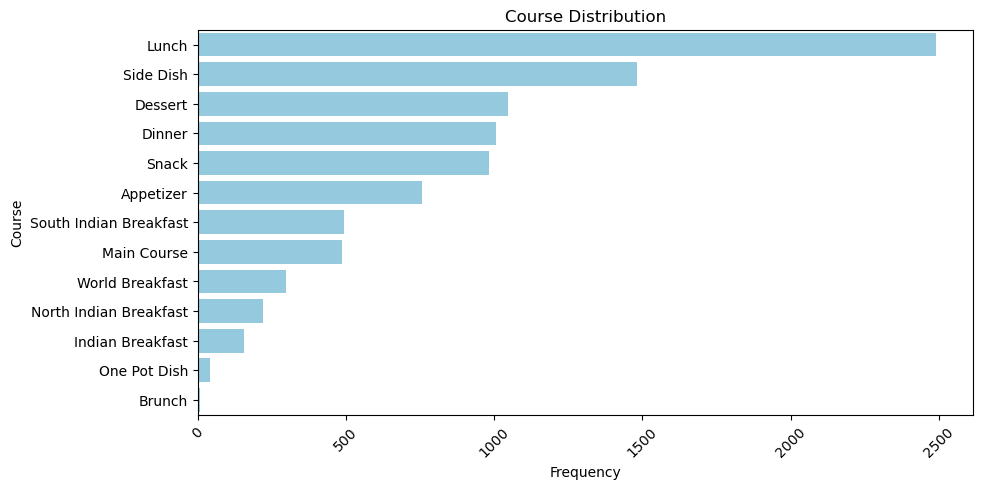

In [16]:
plot_top_categories(recom_df, 'course')

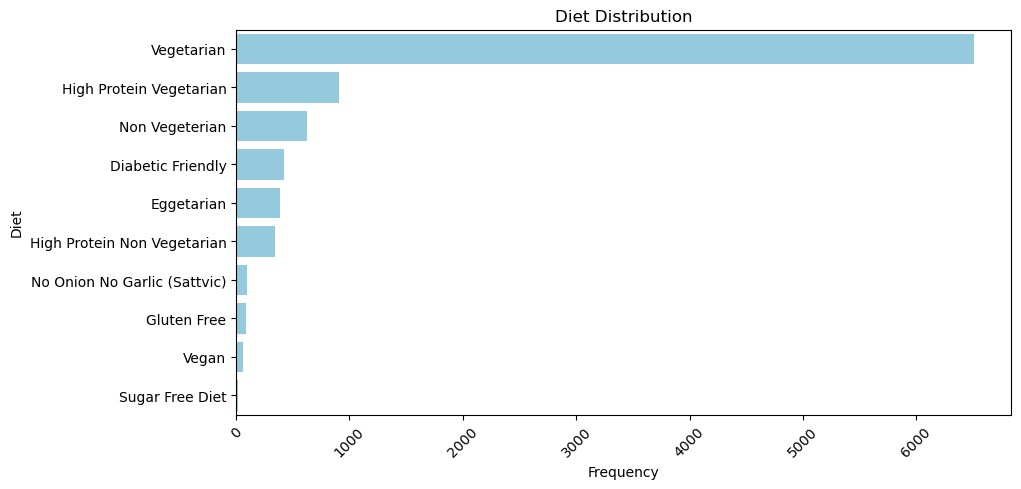

In [17]:
plot_top_categories(recom_df, 'diet')

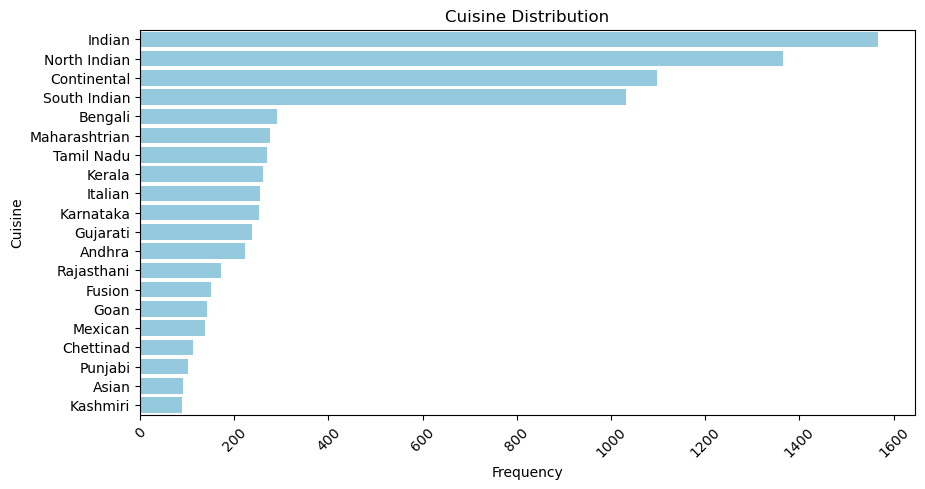

In [18]:
plot_top_categories(recom_df, 'cuisine')

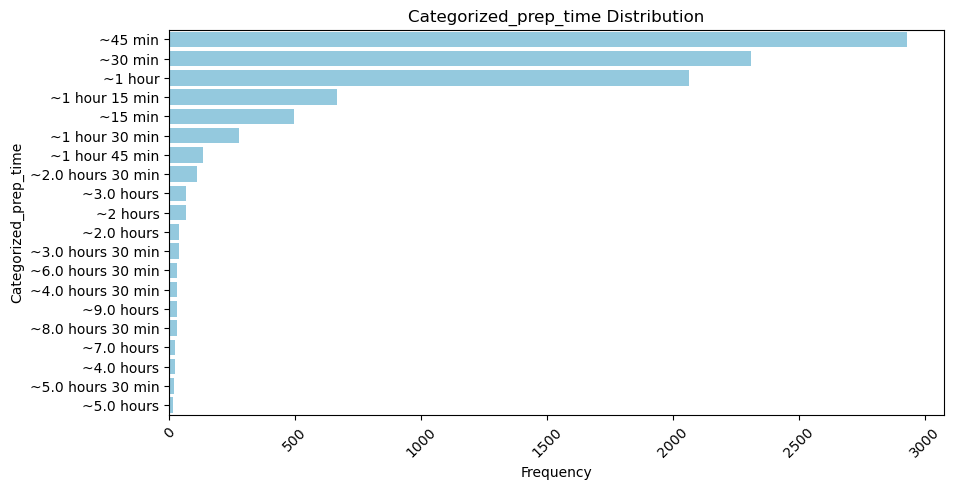

In [19]:
plot_top_categories(recom_df, 'categorized_prep_time')

Clean the "ingredients" column and conduct EDA on it

A- Clean the "ingredients" column 

In [20]:
unwanted_words = ['cleaned','and','washed','as','needed','thinly','sliced','Thin','add','adjustable','adjust','just','unripe', 'unskimmed', 
                  'more', 'more if','rings', 'I', 'have','used', 'I like adding','mashed','you', 'can',"minced",'preferably','per','about',
                  'warm','very', 'vertically','well','long','tsp','tbsp', 'uncooked','unpeeled','your','th','the','of','powdered',
                  'could', 'also', 'use','give', 'it','is', 'prefered','if','bunch','a','small', 'piece','pieces', 'pinch',"medium sized",
                  'additional','assorted','approximately','optional','broken','bowl','finely','chopped','small','cut','roasted',
                  'thick','cubes','julienned','deseeded', "de-veined",'slices', "only", "need",'taste', 'required','boiled',"big", "large",
                  'coarsely','pounded','grated','blanched','a','few','pureed','made','cubed','steamed','quartered','into','preferable',
                  'peeled','slivered','or','whisked','nicely','on','diced',' but recommended','according','overnight',"peel",
                  'soaked','in','roughly','Wet','Ingredients','Everest brand', 'Enough','any','other','s ', 'teaspoon', "one","two",
                  'tablespoons','tablespoon', "eggless", " gluten free", "no onion", "no garlic", "no egg", "no eggs"]

# Download stopwords list
nltk.download('stopwords') 
stop_words = set(stopwords.words('english'))
#stop_words.update(unwanted_words)

# Load the English language model from spaCy
nlp = spacy.load("en_core_web_sm")

# Function to clean and retain only nouns (ingredients)
def clean_ingredients(ingredient_text):
    cleaned_text = re.sub(r'^"|"', '', ingredient_text.strip())
    icleaned_text =  re.sub(r'Archanas\s*Kitchen|Archana\\\\s Kitchen', '',cleaned_text)
    cleaned_text = re.sub(r'Archana\\s Kitchen', '',cleaned_text)
    cleaned_text = re.sub(r'\d+(?:-\d+)?(?:/\d+)?\s*(?:cup|cups?|tablespoon|tablespoons?|teaspoon|teaspoons?|gms?|gram|grams?|kg|ml|inch|pound|pounds?|liters?)?\s*', ',', 
                          cleaned_text, flags=re.IGNORECASE)# Remove quantities and units
    cleaned_text = re.sub(r'\d+\s+\b\w+\b', ',', cleaned_text, flags=re.IGNORECASE)##find a number followed by unit
    cleaned_text = re.sub(r'\b(to|for|with|without|salt)\b', r', \1', cleaned_text, flags=re.IGNORECASE) # Add a comma before the words "to" or "for" (case-insensitive)
    
    for word in unwanted_words:
        cleaned_text = re.sub(r'\b' + re.escape(word) + r'\b', '', cleaned_text, flags=re.IGNORECASE)

     # Split the cleaned text into individual ingredients 
    ingredient_list = [ingredient.strip().lower() for ingredient in cleaned_text.split(',') if ingredient.strip() 
                       and not ingredient.strip().lower().startswith('for') 
                       and not ingredient.strip().lower().startswith('to') 
                       and not ingredient.strip().lower().startswith('with')
                      and not ingredient.strip().lower().startswith('without')
                      and not ingredient.strip().lower().startswith('no')]
    
    processed_ingredients = []
    for ingredient in ingredient_list:
        # Create a spaCy document object for each ingredient
        doc = nlp(ingredient)
        # Keep only noun phrases or single nouns as ingredients
        lemmatized_words = [token.lemma_.lower() for token in doc if token.pos_ not in {"VERB", "ADV"} and token.is_alpha and token.text.lower() not in stop_words]
        if lemmatized_words:  # if it is not empty
            processed_ingredients.append(" ".join(lemmatized_words))  # Join multi-word ingredients like 'cumin powder' 
    return  processed_ingredients

recom_df['cleaned_ingredients'] = recom_df['ingredients'].apply(clean_ingredients)
recom_df['cleaned_ingredients']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rogha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       [indian borage doddapatre, curd dahi yogurt, c...
1       [fish, curd dahi yogurt, onion, green chilli, ...
2       [colocasia root arbi, green bell pepper capsic...
3       [brinjal baingan eggplant, onion, ginger garli...
4       [mango raw, jaggery, turmeric powder haldi, ta...
                              ...                        
9491    [spinach leave palak, chana dal bengal gram da...
9492    [whole wheat flour, sugar, soda, butter, salt,...
9493    [amla gooseberry, fresh coconut, methi seed fe...
9494    [raw banana, garlic, green chilli, salt, musta...
9495    [onion, green chilli, mint leave pudina, fresh...
Name: cleaned_ingredients, Length: 9496, dtype: object

In [21]:
recom_df["cleaned_ingredients"].value_counts()

cleaned_ingredients
[]                                                                                                                                                                                                                                                      6
[lemon, sugar, salt, red chilli powder]                                                                                                                                                                                                                 5
[brinjal baingan eggplant, coriander dhania, green chilli, salt, oil]                                                                                                                                                                                   3
[milk, sugar, curd dahi yogurt, water]                                                                                                                                                                                                

B- Create a unique ingredient list and count the unique ingredient items

In [22]:
# Create a unique ingredient set by flattening the list and removing duplicates
unique_ingredient_list = set(ingredient for sublist in recom_df["cleaned_ingredients"] for ingredient in sublist if ingredient)

#Convert the set to a list
unique_ingredient_list = sorted(unique_ingredient_list)
unique_ingredient_list

['aa oil',
 'aachi fish masala',
 'aam papad sun mango',
 'aamra',
 'aar maach fish',
 'achari masala',
 'achari masala oil',
 'achari mayo',
 'active dry yeast',
 'ada',
 'adjus',
 'adobo sauce',
 'agar agar',
 'agathi keerai',
 'ajwain carom seed',
 'ajwain carom seeds black sesame seed',
 'ajwain carom seeds curry leave',
 'ajwain carom seeds water',
 'ajwain powder',
 'akhrot',
 'al dente',
 'alfalfa powder',
 'alfalfa sprout',
 'alma nellikai',
 'almond',
 'almond almond butter',
 'almond badam',
 'almond butter',
 'almond cashew',
 'almond cashewnut',
 'almond essence badam essence',
 'almond meal badam powder',
 'almond milk',
 'almond milk badam milk',
 'almond nuts pistachio',
 'almond oil badam oil',
 'almond paste',
 'aloe vera extract',
 'along',
 'aloo bhujia',
 'aloo tikki potato',
 'alu',
 'amaranth',
 'amaranth seeds rajgira',
 'ambade',
 'amchur dry mango powder',
 'amchur dry mango powder coriander dhania',
 'amchur dry mango powder mint leave pudina',
 'amchur dry ma

In [23]:
len(unique_ingredient_list)

2639

C- Find the most frequent ingredients and plot their distribution 

In [24]:
#Flatten the list of ingredients from all rows
all_ingredients = [ingredient for sublist in recom_df['cleaned_ingredients'] for ingredient in sublist]

#Count the frequency of each ingredient
ingredient_counts = Counter (all_ingredients)

most_frequent_ingredients = ingredient_counts.most_common(10) 

print(f"Most frequent ingredients: {most_frequent_ingredients[0][0]}, Count: {most_frequent_ingredients[0][1]}")

sorted_clean_ingredients = ingredient_counts.most_common()  
print(sorted_clean_ingredients)

Most frequent ingredients: salt, Count: 8406
[('salt', 8406), ('oil', 3933), ('turmeric powder haldi', 3779), ('onion', 3728), ('green chilli', 3482), ('garlic', 3125), ('red chilli powder', 2880), ('ginger', 2613), ('cumin seeds jeera', 2590), ('mustard seed kadugu', 2230), ('coriander dhania', 2134), ('ghee', 1834), ('water', 1782), ('dry red chilli', 1719), ('sugar', 1687), ('asafoetida hing', 1501), ('milk', 1477), ('garam masala powder', 1401), ('coriander powder dhania', 1394), ('fresh coconut', 1380), ('curry', 1367), ('cumin powder jeera', 1140), ('lemon juice', 1104), ('curd dahi yogurt', 1102), ('cinnamon stick dalchini', 1056), ('black pepper powder', 1015), ('extra virgin olive oil', 953), ('clove laung', 903), ('carrot gajjar', 885), ('cardamom elaichi pod seed', 879), ('potato aloo', 873), ('jaggery', 868), ('whole black peppercorn', 844), ('nut', 773), ('whole wheat flour', 762), ('white urad dal split', 751), ('sprig curry', 734), ('butter', 722), ('cardamom powder elai

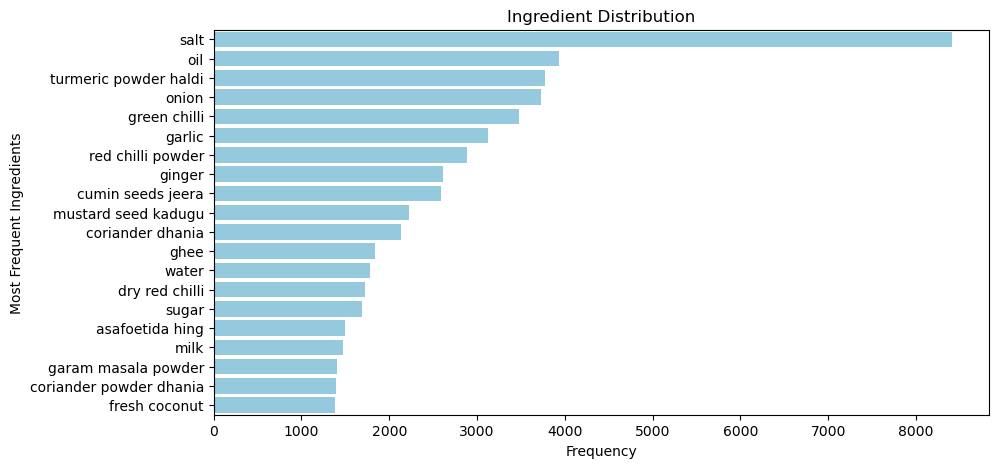

In [25]:
# Separate the ingredient names and their counts for plotting
ingredients, counts = zip(*sorted_clean_ingredients)

plt.figure(figsize=(10, 5)) 
sns.barplot(x=counts[:20], y=ingredients[:20], color='skyblue')  
plt.title('Ingredient Distribution')  
plt.xlabel('Frequency') 
plt.ylabel('Most Frequent Ingredients')  
plt.show()  

Add two columns of "allergens" and "allergen_type" to our data using the exsiting information and conduct EDA on them

A- Find allergen food in "cleaned_ingredients" column

In [26]:

allergen_list = ['milk', 'cheese', 'feta', 'paneer','yogurt', 'butter', 'cream', 'egg', 'tree nut', 'walnut', 'Pistachio', 'hazelnut','almond', 'pecan', 'cashew','peanut', 
                 'wheat','grain','cereal', 'triticale', 'barley', 'oats', 'rye','bread', 'naan', 'pasta', 'spaghetti', 'macaroni', 'lasagna', 'soy', 'soybean', 'soya','lupin', 'mustard', 'sesame', 
                 'fish','salmon', 'tuna', 'cod', 'crustacea','mollusc', 'clam', 'mussel', 'oyster','squid', 'shellfish', 'crab', 'lobster', 'shrimp']

# Function to find allergens in each row of ingredients
def find_allergens(ingredient_list):
    allergens_found = [ingredient for ingredient in ingredient_list if ingredient in allergen_list]
    return allergens_found if allergens_found else None  # Return None if no allergens are found

recom_df['allergens'] = recom_df['cleaned_ingredients'].apply(find_allergens)
recom_df['allergens']

0                 None
1               [fish]
2                 None
3                 None
4                 None
             ...      
9491              None
9492    [butter, milk]
9493              None
9494              None
9495              None
Name: allergens, Length: 9496, dtype: object

In [27]:
recom_df['allergens'].value_counts()

allergens
[milk]                          974
[butter]                        382
[milk, milk]                    104
[walnut]                         82
[butter, milk]                   75
                               ... 
[milk, butter, milk, cheese]      1
[butter, walnut, walnut]          1
[walnut, milk, milk]              1
[pasta, shrimp]                   1
[butter, butter, cheese]          1
Name: count, Length: 95, dtype: int64

B- Process the texts of "name", "instructions" and "description" columns to prepare them for allergen search

In [ ]:
unwanted_words = ["recipe", "no egg", "no egges", "no onion", "no garlic"]
# Load the English model in spaCy
nlp = spacy.load("en_core_web_sm")

# Load stopwords
stop_words = set(stopwords.words('english'))
#stop_words.update(unwanted_words)

# Function to process the text (lemmatization and removing stopwords) and return only nouns. 
def process_text(text):
    for word in unwanted_words:
        cleaned_text = re.sub(r'\b(?:' + '|'.join(map(re.escape, unwanted_words)) + r')\b', '', text, flags=re.IGNORECASE)

    doc = nlp(cleaned_text)  # Process the text with spaCy NLP model
    lemmatized_words = []
    for token in doc:
        if token.text.lower() == "eggless":
            lemmatized_words.append(token.text.lower())
        # Skip if token is not alphabetic, is a stopword, or is an unwanted word
        if token.is_alpha and token.text.lower() not in stop_words:
            lemmatized_words.append(token.lemma_.lower())
        # Preserve "eggless" as-is

    # Remove "egg" if "eggless" is present in the list
    if "eggless" in lemmatized_words and "egg" in lemmatized_words:
        lemmatized_words = [word for word in lemmatized_words if word != "egg"]   
            
    return ' '.join(lemmatized_words)  # Return processed text as a string
   
recom_df['processed_name'] = recom_df['name'].apply(process_text)
recom_df['processed_instructions'] = recom_df['instructions'].apply(process_text)
recom_df['processed_description'] = recom_df['description'].apply(process_text)

In [29]:
recom_df['name'][0]

'Doddapatre Tambuli Recipe (Karpooravalli Thayir Pachadi)'

In [30]:
recom_df['processed_name'][0]

'doddapatre tambuli karpooravalli thayir pachadi'

In [31]:
recom_df['instructions'][0]

'To begin making the Doddapatre Tambuli, first thoroughly wash the doddapatre leaves and wipe them dry between kitchen towels.Then place a kadai on the heat. Heat a tablespoon of ghee in it, and add the doddapatre leaves to the ghee. Sauce them gently on a medium heat until they change colour and sweat. continue to saute until all the water they release has evaporated. The leaves will change colour and reduce to half the quantity.Take them out of the kadai and transfer them into a mixer and set the jar aside.In the same kadai, dry roast jeera and black pepper corns till the jeera turns dark in colour and aromatic. Add these roasted spices also into the mixer jar.Add coconut, salt to the mixer too and grind it using half the quantity of yogurt, until it is a smooth paste.Transfer the paste into a serving bowl. Top it up with the remaining yogurt and whisk until it is smoothly combined.Place a tadka ladle on the heat and melt some ghee in it. When the ghee is warm, add the cumin seeds, a

In [32]:
recom_df['processed_instructions'][0]

'begin make doddapatre tambuli first thoroughly wash doddapatre leave wipe dry kitchen towel place kadai heat heat tablespoon ghee add doddapatre leave ghee sauce gently medium heat change colour sweat continue saute water release evaporate leave change colour reduce half quantity take kadai transfer mixer set jar aside kadai dry roast jeera black pepper corn till jeera turn dark colour aromatic add roasted spice also mixer jar add coconut salt mixer grind use half quantity yogurt smooth paste transfer paste serve bowl top remain yogurt whisk smoothly combine place tadka ladle heat melt ghee ghee warm add cumin seed allow crackle pour tempering tambuli mix well serve child along steamed rice'

C- Search for allergen food in combined processed columns 

In [33]:
# Function to search for allergens in combined processed columns 
def find_allergens(row, allergen_list):
    allergens_found = set()
    
    # Combine processed text columns to search within them
    combined_text = ' '.join([row['processed_name'], row['processed_instructions'], row['processed_description']])
    
    for allergen in allergen_list:
        if allergen in combined_text:
            allergens_found.add(allergen)
    
    # If allergens are found, update the allergen column as a list
    if allergens_found:
        # Check if there are existing allergens in the row 
        existing_allergens = row['allergens']
        if existing_allergens is None:
            existing_allergens = []  

        # Combine new allergens with existing ones, ensuring uniqueness
        updated_allergens = list(set(existing_allergens) | allergens_found)
        return updated_allergens  
    
    # If no new allergens are found, return the existing allergen list
    return row['allergens']

recom_df['allergens'] = recom_df.apply(lambda row: find_allergens(row, allergen_list), axis=1)
recom_df['allergens']

0                         [yogurt]
1                           [fish]
2                         [peanut]
3        [peanut, sesame, mustard]
4                         [sesame]
                   ...            
9491                        [oats]
9492    [butter, milk, egg, wheat]
9493                          None
9494                     [mustard]
9495                     [mustard]
Name: allergens, Length: 9496, dtype: object

In [34]:
recom_df['allergens'].value_counts()

allergens
[mustard]                                          1232
[milk]                                              219
[wheat]                                             192
[yogurt]                                            175
[egg]                                               143
                                                   ... 
[yogurt, grain, cashew]                               1
[grain, walnut, wheat]                                1
[butter, milk, walnut, oats, grain, egg, wheat]       1
[cheese, milk, lasagna, cream, pasta]                 1
[butter, peanut, milk, walnut]                        1
Name: count, Length: 1550, dtype: int64

In [35]:
#count none allergen rows 
recom_df['allergens'].isna().sum()

1550

In [36]:
recom_df['allergens'].fillna("unknown", inplace=True)

In [37]:
contain_egg = recom_df[recom_df['processed_name'].str.contains("eggless")]
contain_egg

,name,ingredients,description,instructions,cuisine,course,diet,prep_time,categorized_prep_time,cleaned_ingredients,allergens,processed_name,processed_instructions,processed_description
2558,Eggless Thandai Mini Cheesecake Recipe,"For the crust 1-1/2 cups Marie Biscuit , or an...",Thandai Mini Cheesecake Recipe is a delicious ...,"To begin with Thandai Mini Cheesecake, firstly...",Fusion,Dessert,Vegetarian,100.0,~1 hour 45 min,"[marie biscuit, digestive cookie, butter unsal...","[butter, cheese, milk, egg, cream]",eggless eggless thandai mini cheesecake,begin thandai mini cheesecake firstly prepare ...,thandai mini cheesecake delicious creamy desse...
3459,3 minute Eggless Strawberry Red Velvet Mug Cak...,"Archana\s Kitchen Strawberry Velvet Cake Mix, ...",Satisfy your sweet cravings in just 3 minutes ...,To begin making the\xa0Eggless Strawberry Red ...,Continental,Dessert,Vegetarian,6.0,~15 min,"[velvet cake mix, oil, curd dahi yogurt, nut]","[milk, cashew, egg, wheat, barley]",minute eggless eggless strawberry red velvet m...,begin make strawberry red velvet mug cake firs...,satisfy sweet craving minute eggless eggless s...
3589,Pineapple Upside Down Cake Made with Archana's...,"Archana\s Kitchen Rich Vanilla Cake Mix, Oil, ...",The Pineapple Upside Down Cake is an absolutel...,To begin making the Pineapple Upside Down Cake...,Continental,Snack,Vegetarian,40.0,~45 min,"[rich vanilla cake mix, oil, curd dahi yogurt,...","[yogurt, butter, milk, grain, egg, cream, whea...",pineapple upside cake make archana kitchen egg...,begin make pineapple upside cake first measure...,pineapple upside cake absolutely delectable ca...
3629,3 minute Eggless Strawberry Red Velvet Mug Cak...,"Archana\s Kitchen Strawberry Velvet Cake Mix, ...",Satisfy your sweet cravings in just 3 minutes ...,To begin making the\xa0Eggless Strawberry Red ...,Continental,Dessert,Vegetarian,6.0,~15 min,"[velvet cake mix, oil, curd dahi yogurt, nut]","[milk, cashew, egg, wheat, barley]",minute eggless eggless strawberry red velvet m...,begin make strawberry red velvet mug cake firs...,satisfy sweet craving minute eggless eggless s...
3699,Eggless Bread Omelette Recipe,"Gram flour (besan), All Purpose Flour (Maida),...",Bread Omelette is very common recipe but this ...,"To begin making Eggless Bread Omelette Recipe,...",Continental,World Breakfast,Vegetarian,15.0,~15 min,"[gram flour besan, purpose flour maida, red ch...","[butter, egg, bread]",eggless eggless bread omelette,begin make eggless eggless bread omelette take...,bread omelette common different prepare withou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9233,Eggless Herbed Focaccia Bread Recipe,"All Purpose Flour (Maida), Milk, Sugar, Salt, ...",This Eggless Herbed Focaccia Bread makes a gre...,"To prepare Eggless Focaccia Bread, get prep wi...",Italian,Side Dish,Vegetarian,180.0,~3.0 hours,"[purpose flour maida, milk, sugar, salt, activ...","[milk, egg, bread, pasta]",eggless eggless herbed focaccia bread,prepare eggless eggless focaccia bread get pre...,eggless eggless herbed focaccia bread make gre...
9288,Eggless Coffee Souffle Recipe With Chocolate S...,"Dark chocolate, Milk, Caster Sugar, All Purpos...",Coffee Souffle Recipe With Chocolate Sauce is ...,To prepare Eggless Coffee Souffle Recipe With ...,French,Dessert,Vegetarian,25.0,~30 min,"[dark chocolate, milk, caster sugar, purpose f...","[butter, milk, egg, cream]",eggless eggless coffee souffle chocolate sauce,prepare eggless eggless coffee souffle chocola...,coffee souffle chocolate sauce puff fluffy fra...
9330,Eggless Apple Pie Cookie Recipe,"Apples, Butter (Salted), Cinnamon Powder (Dalc...","A fridge full of apples, a cold gust of wind a...",To begin the preparation of Eggless Apple Pie ...,Continental,Dessert,Vegetarian,55.0,~1 hour,"[apple, butter, cinnamon powder dalchini, cane...","[butter, egg, cream]",eggless eggless apple pie cookie,begin preparation eggless eggless apple pie co...,fridge full apple cold gust wind l

In [38]:
recom_df["processed_description"].loc[9492]

'vettu cake famous tea shop snack tamil nadu kerala call vettu cake form crack vettu tamil fry heirloom mother teach usually prepared add use maida want make healthy hence try wheat flour use create kerala style vettu cake eggless eggless wholewheat tea shop cake come good crispy outside soft inside taste differ either serve kerala style vettu cake eggless eggless wholewheat tea shop cake tea time coconut kewra drink ginger cardamom chai'

In [39]:
recom_df["description"].loc[9492]

'Vettu cake is a famous tea shop snack in Tamil Nadu and Kerala. It is called vettu cake as it forms cracks (vettu in tamil) while frying. This a heirloom recipe that my mother taught me. It is usually prepared adding eggs and using maida. I wanted to make it more healthy and hence tried the same with wheat flour and used no eggs, creating Kerala Style Vettu Cake Recipe (Eggless Wholewheat Tea Shop Cake). It came out too good with crispy outside and soft inside. The taste did not differ any, either. Serve Kerala Style Vettu Cake Recipe (Eggless Wholewheat Tea Shop Cake) during tea time with Coconut Kewra Drink or Ginger Cardamom Chai.'

D- Create "allergen_type" column using the data in "allergens" column

In [40]:
allergen_categories = {
    "Dairy": ["milk", "paneer", "feta","cheese", "yogurt", "butter", "cream"],
    "Eggs": ["egg"],
    "Fish and Shellfish": ["fish", "shellfish", 'crustacea','mollusc', "salmon", "tuna", "cod", "shrimp", "crab", "lobster", "mussel", "oyster", "squid"],
    "Tree Nuts and Peanuts": ['tree nut', "almond", "cashew", "walnut", "peanut", "pistachio", 'pecan', 'hazelnut'],
    "Legumes and Seeds": ["peanut", "soybean",' soy', 'soya', "sesame", "mustard"],
    "Grains and Gluten": ["grain", 'triticale', "wheat", "barley", "rye", "oats", "cereal", 'bread', 'naan', 'pasta', 'spaghetti', 'macaroni', 'lasagna']
}
def categorize_allergens(allergens):
    allergen_types = []
    for allergen in allergens:
        for category, items in allergen_categories.items():
            if allergen in items and category not in allergen_types:
                allergen_types.append(category)
    return allergen_types if allergen_types else None

recom_df["allergen_type"] = recom_df["allergens"].apply(categorize_allergens)
recom_df["allergen_type"]

0                                          [Dairy]
1                             [Fish and Shellfish]
2       [Tree Nuts and Peanuts, Legumes and Seeds]
3       [Tree Nuts and Peanuts, Legumes and Seeds]
4                              [Legumes and Seeds]
                           ...                    
9491                           [Grains and Gluten]
9492              [Dairy, Eggs, Grains and Gluten]
9493                                          None
9494                           [Legumes and Seeds]
9495                           [Legumes and Seeds]
Name: allergen_type, Length: 9496, dtype: object

In [41]:
recom_df['allergen_type'].fillna("Unknown", inplace=True)

In [42]:
recom_df["allergen_type"].value_counts()

allergen_type
Unknown                                                                                           1585
[Legumes and Seeds]                                                                               1442
[Dairy]                                                                                           1254
[Dairy, Grains and Gluten]                                                                         783
[Grains and Gluten]                                                                                622
                                                                                                  ... 
[Tree Nuts and Peanuts, Dairy, Grains and Gluten, Legumes and Seeds]                                 1
[Fish and Shellfish, Tree Nuts and Peanuts, Eggs, Legumes and Seeds]                                 1
[Fish and Shellfish, Dairy, Tree Nuts and Peanuts]                                                   1
[Tree Nuts and Peanuts, Grains and Gluten, Legumes and Seed

E- Check if index values of "Gluten free" data in "diet" column are matched with the index values of "Grains and Gluten" data in "allergen_type" column

In [43]:
gluten_free_df = recom_df[recom_df['diet']=="Gluten Free"]
gluten_free_df

,name,ingredients,description,instructions,cuisine,course,diet,prep_time,categorized_prep_time,cleaned_ingredients,allergens,processed_name,processed_instructions,processed_description,allergen_type
19,Cabbage & Buttermilk Curry Recipe,"1 Cabbage (Patta Gobi/ Muttaikose) , medium si...",Cabbage & Buttermilk Curry Recipe is one of my...,"To prepare Cabbage & Buttermilk Curry Recipe, ...",Indian,Lunch,Gluten Free,35.0,~45 min,"[cabbage muttaikose, green chilli, slit, musta...","[butter, milk, mustard]",cabbage buttermilk curry,prepare cabbage buttermilk curry prep ingredie...,cabbage buttermilk curry one mother creation a...,"[Dairy, Legumes and Seeds]"
177,Besan Arbi Roast Recipe - Spicy Colocasia Stir...,250 grams Colocasia root (Arbi) 2 tablespoon ...,Arbi is Colocasia or Taro Root. It’s a root ve...,"To begin making the Besan Arbi Roast Recipe, s...",Indian,World Breakfast,Gluten Free,50.0,~1 hour,"[colocasia root arbi, gram flour besan, red ch...",unknown,besan arbi roast spicy colocasia stir fry,begin make besan arbi roast scrub arbi get rid...,arbi colocasia taro root root vegetable gluten...,Unknown
203,Mixed Vegetable Akki Roti Recipe,"300 grams Rice flour 1 Carrot (Gajjar) , grat...",Mixed Vegetable Akki Roti is a famous recipe f...,"To prepare Mixed Vegetable Akki Roti Recipe, g...",North Karnataka,South Indian Breakfast,Gluten Free,85.0,~1 hour 30 min,"[rice flour, carrot gajjar, cucumber, green be...","[butter, bread]",mixed vegetable akki roti,prepare mixed vegetable akki roti grate chop v...,mixed vegetable akki roti famous karnataka art...,"[Dairy, Grains and Gluten]"
281,Masala Akki Roti With Spinach Recipe - sarvapi...,3 cups Rice flour 2 cups Water 1 cup Spring ...,Sarvapindi also known as Akki roti in some are...,To begin preparing the Masala Akki Roti with S...,Andhra,South Indian Breakfast,Gluten Free,100.0,~1 hour 45 min,"[rice flour, water, spring onion green, spinac...","[yogurt, sesame]",masala akki roti spinach sarvapindi,begin prepare masala akki roti spinach deep po...,sarvapindi also know akki roti area telangana ...,"[Dairy, Legumes and Seeds]"
348,Mini Bajra Uttapam Recipe,For the Bajra uttapam 1/2 cup Bajra (seeds) 1...,Mini Bajra Uttapam Recipe is essentially a mil...,"To begin making the Mini Bajra Uttapam Recipe,...",South Indian,South Indian Breakfast,Gluten Free,520.0,~8.0 hours 30 min,"[bajra seed, idli rice, white urad dal whole, ...",unknown,mini bajra uttapam,begin make mini bajra uttapam first make batte...,mini bajra uttapam essentially millet base utt...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9272,Instant Puliyodharai Powder Recipe (Puliyogare...,"Tamarind, Jaggery, Asafoetida (hing), Salt, Ch...",Puliyodharai/Puliyogare/Pulihora is a traditio...,"""To begin making Instant Puliyodharai/ Puliyog...",South Indian,Appetizer,Gluten Free,55.0,~1 hour,"[tamarind, jaggery, asafoetida hing, salt, cha...","[peanut, sesame, mustard]",instant puliyodharai powder puliyogare pulihor...,begin make instant puliyogare pulihora powder ...,puliyodharai puliyogare pulihora traditional r...,"[Tree Nuts and Peanuts, Legumes and Seeds]"
9273,Homemade Herb Butter Recipe,"Butter (Salted), Parsley leaves, Basil leaves,...",Having a Homemade Herb Butter ready in your re...,To begin making the\xa0Homemade Herb Butter Re...,Continental,Side Dish,Gluten Free,30.0,~30 min,"[butter, parsley, basil leave, lemon zest]","[butter, pasta, bread]",homemade herb butter,begin make herb butter combine ingredient mini...,homemade herb butter ready refrigerator get re...,"[Dairy, Grains and Gluten]"
9274,Kolhapuri Masala Recipe (Maharashtrian Masala ...,"Coriander (Dhania) Seeds, Cumin seeds (Jeera),...",Kolhapuri Masala Recipe is a spicy Maharashtri...,To begin making the\xa0Kolhapuri Masala Recipe...,Maharashtrian,Side Dish,Gluten Free,30.0,~30 min,"[coriander dhania seed, cumin seeds jeera, coc...",unknown,kolhapuri masala maharashtrian masala chutney ...,begin make masala traditional mahar

In [44]:
gluten_df = recom_df[recom_df["allergen_type"].apply(lambda x: "Grains and Gluten" in x)]
gluten_df

,name,ingredients,description,instructions,cuisine,course,diet,prep_time,categorized_prep_time,cleaned_ingredients,allergens,processed_name,processed_instructions,processed_description,allergen_type
12,Mixed Vegetable Pulao Recipe,1 cup Brown Rice 2 tablespoons Ghee 2 cloves...,The Mixed Vegetable Pulao Recipe is a simple a...,To begin making the Mixed Vegetable Pulao Reci...,Indian,Dinner,Vegetarian,60.0,~1 hour,"[brown rice, ghee, garlic, green chilli, slit,...",[grain],mixed vegetable pulao,begin make mixed vegetable pulao first wash so...,mixed vegetable pulao simple quick cook dish b...,[Grains and Gluten]
14,Hyderabadi Shahi Mixed Vegetable Curry Recipe,"12 Baby Potatoes , boiled peeled and cubed 1/...",The Hyderabadi Shahi Mixed Vegetable Curry Rec...,To begin making the Hyderabadi Shahi Mixed Veg...,Hyderabadi,Lunch,Vegetarian,70.0,~1 hour 15 min,"[baby potato, green peas matar, carrot gajjar,...","[almond, cashew, cream, wheat]",hyderabadi shahi mixed vegetable curry,begin make hyderabadi shahi mixed vegetable cu...,hyderabadi shahi mixed vegetable curry rich gr...,"[Tree Nuts and Peanuts, Dairy, Grains and Gluten]"
22,Karwar Style Valval Recipe (Mixed Vegetables I...,"1 cup Green beans (French Beans) , Chopped 1 ...",Karwar Style Valval Recipe (Mixed Vegetables I...,To begin making the Karwar Style Valval Recipe...,Coastal Karnataka,Lunch,Vegetarian,35.0,~45 min,"[green bean french bean, carrot gajjar, green ...","[milk, cream, wheat, mustard]",karwar style valval mixed vegetables coconut milk,begin make karwar style valval mixed vegetable...,karwar style valval mixed vegetables coconut m...,"[Dairy, Grains and Gluten, Legumes and Seeds]"
28,Whole Wheat Lachha Paratha Recipe-Multilayered...,2 cups Whole Wheat Flour 1 teaspoon Salt Ghee...,The Whole Wheat Lachha Paratha Recipe is a cla...,To begin making the Whole Wheat Lachha Paratha...,Indian,Dinner,Diabetic Friendly,70.0,~1 hour 15 min,"[whole wheat flour, salt ghee]","[yogurt, paneer, bread, wheat]",whole wheat lachha paratha layered indian flat...,begin make whole wheat lachha paratha first kn...,whole wheat lachha paratha classic indian laye...,"[Dairy, Grains and Gluten]"
30,Baked Amritsari Kulcha Recipe (Without Yeast),1-1/2 cup All Purpose Flour (Maida) 1 teaspoo...,Kulcha is a type of mildly leavened flatbread ...,To begin making the Baked Amritsari Kulcha rec...,Punjabi,Dinner,Vegetarian,20.0,~30 min,"[purpose flour maida, salt, sugar, powder, sod...","[butter, naan, sesame, bread]",baked amritsari kulcha without yeast,begin make baked amritsari kulcha medium sized...,kulcha type mildly leaven flatbread originate ...,"[Dairy, Grains and Gluten, Legumes and Seeds]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9486,Arbi Cutlet Recipe (Spiced Colocasia Patties),"Colocasia root (Arbi), Onion, Green Chilli, Re...",Arbi Cutlet is a crispy golden brown patties m...,We begin making the Arbi Cutlet (Spiced Coloca...,North Indian,Snack,Vegetarian,40.0,~45 min,"[colocasia root arbi, onion, green chilli, red...",[bread],arbi cutlet spiced colocasia patties,begin make arbi cutlet spiced colocasia pattie...,arbi cutlet crispy golden brown patty make col...,[Grains and Gluten]
9488,Alu Vadi Or Patrode Recipe - Maharashtrian Sna...,"Colocasia Leaves (Arbi), Multigrain flour, Tam...",Alu vadi or Patrode is a typical Maharashtrian...,To begin making Alu Vadi or Patrode Recipe - M...,Maharashtrian,Snack,Vegetarian,40.0,~45 min,"[colocasia leave arbi, multigrain flour, tamar...","[grain, sesame]",alu vadi patrode maharashtrian snack colocasia...,begin make alu vadi patrode maharashtrian snac...,alu vadi patrode typical maharashtrian snack s...,"[Grains and Gluten, Legumes and Seeds]"
9490,Palak Puri Recipe (Crispy Spinach Puri Snack),"Whole Wheat Flour, Spinach Leaves (Palak), Gin...","Puri is deep fried Indian bread, commonly avai...","Wash the finely chopped spinach, and let it dr...",North Indian,Snack,Vegetarian,30.0,~30 min,"[whole wheat flour, spinach 

In [45]:
# Check if index values of glute_df are in gluten_free_df
similarity_gluten_wih_gluten_free = gluten_df.index.isin(gluten_free_df.index)

# This will give you a boolean array indicating whether each index in glute_df is also in gluten_free_df
print(similarity_gluten_wih_gluten_free)

# If you want the index numbers that are present in both dataframes:
common_indices = gluten_df.index[similarity_gluten_wih_gluten_free]
print("Common indices:", common_indices.tolist())

[False False False ... False False False]
Common indices: [203, 578, 683, 782, 892, 1438, 1609, 2190, 3124, 4266, 4800, 5078, 5121, 5419, 5546, 5576, 5577, 5647, 6803, 6959, 7884, 8507, 8531, 8935, 9273, 9280, 9480]


In [46]:
recom_df.iloc[5121]

name                              Buckwheat Crepe Recipe with Fruit Compote
ingredients               Buckwheat Flour (Kuttu Ka Atta), Whole Wheat F...
description               Buckwheat Crepe Recipe with Fruit Compote is a...
instructions              To begin making the Buckwheat Crepes Recipe wi...
cuisine                                                         Continental
course                                                      World Breakfast
diet                                                            Gluten Free
prep_time                                                              60.0
categorized_prep_time                                               ~1 hour
cleaned_ingredients       [buckwheat flour kuttu ka atta, whole wheat fl...
allergens                          [butter, grain, milk, egg, cream, wheat]
processed_name                                buckwheat crepe fruit compote
processed_instructions    begin make buckwheat crepes fruit compote firs...
processed_de

In [47]:
recom_df["description"][5121]

'Buckwheat Crepe Recipe with Fruit Compote is an excellent recipe to use to incorporate this high-protein, gluten-free grain into your diet. Buckwheat flour is said to be excellent for diabetes, digestion and the treatment of high blood pressure since its high in Rutin. Along with a seasonal fruit compote, these Buckwheat Crepes are an excellent way to kickstart your day with a wholesome dose of healthy energy.'

In [48]:
recom_df["instructions"][5121]

'To begin making the Buckwheat Crepes Recipe with Fruit Compote, first prepare the plum and strawberry compote., Clean and chop the fruits and transfer them into a heavy bottom pan, along wit h the brown sugar, cinnamon powder and thyme., Place the pan on the heat and allow the fruit to cook down till it begins to bubble. Reduce the heat and simmer for about 15-20 minutes till the plums are cooked but not mushy., Set the compote aside and prepare the pancakes. For the pancakes, Sift together buckwheat flour, whole wheat flour, baking powder, baking soda and salt in a mixing bowl., In another bowl, whisk together the eggs, buttermilk, melted butter and brown sugar till blended well., Add the egg-buttermilk (wet ingredients) mixture to the sifted flour and whisk together gently till it forms a smooth batter., Place a skillet on the heat and preheat it., When ready to make the crepes, pour a ladle full of pancake batter on the warm skillet and gently spread it into a thin layer, using out

E- Find the most frequent allergen type and plot their distribution 

In [49]:
#Flatten the list of ingredients from all rows
all_allergen_type = [allergen for sublist in recom_df['allergen_type'] if isinstance(sublist, list) for allergen in sublist]

#Count the frequency of each allergen type
allergen_type_counts = Counter (all_allergen_type)

most_frequent_allergen_type = allergen_type_counts.most_common(10) 

print(f"Most frequent allergen type: {most_frequent_allergen_type[0][0]}, Count: {most_frequent_allergen_type[0][1]}")

sorted_allergen_type = allergen_type_counts.most_common()  
#print(sorted_allergen_type)

Most frequent allergen type: Dairy, Count: 4419


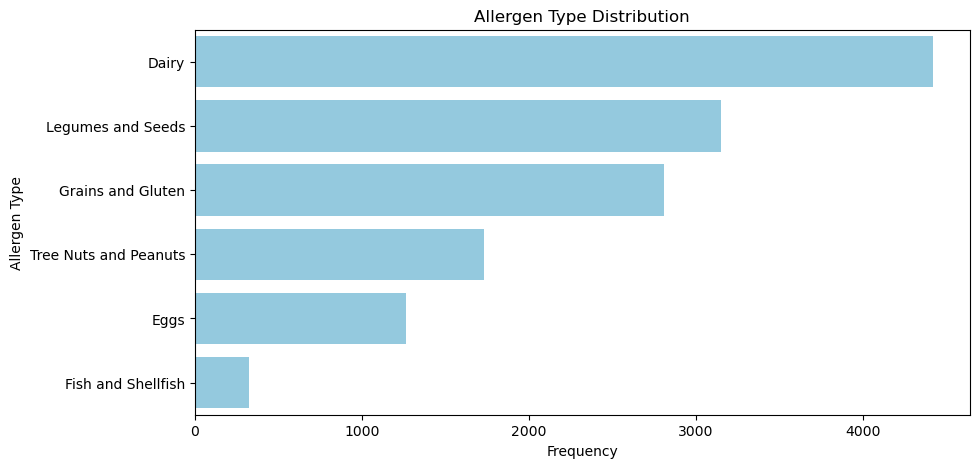

In [50]:
# Separate the allergen types and their counts for plotting
allergen_type, counts = zip(*sorted_allergen_type)

plt.figure(figsize=(10, 5)) 
sns.barplot(x=counts, y=allergen_type, color='skyblue')  
plt.title('Allergen Type Distribution')  
plt.xlabel('Frequency') 
plt.ylabel('Allergen Type')  
plt.show()  

Prepare the data for topic modeling

In [51]:
# Convert each list in the 'cleaned_ingredient' column to a space-separated string to standardize the form of all precocessed colmuns. 
recom_df["processed_ingredients"] = recom_df['cleaned_ingredients'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

#Combine processed columns of "processed_name"and "processed_ingredients" into a single column for topic modeling
recom_df['combined_name_ingredients'] = recom_df['processed_name'] + ' ' + recom_df['processed_ingredients']

# Combine all processed columns into a single column for topic modeling
recom_df['combined_texts'] = recom_df['processed_name'] + ' ' + recom_df['processed_ingredients'] + ' ' + recom_df['processed_description'] + ' ' + recom_df['processed_instructions']

In [52]:
recom_df.fillna('', inplace=True)
recom_df['prep_time_str'] = recom_df['prep_time'].astype(str)
# Convert `allergen_type` (list) to a string
recom_df['allergen_type_str'] = recom_df['allergen_type'].apply(lambda x: ', '.join(x) if isinstance(x, list) else '')

# Combine all relevant columns into a single string
recom_df['combined_all'] = (recom_df['processed_name'] + ' ' + recom_df['processed_ingredients'] + ' ' + recom_df['processed_description'] + ' ' +
        recom_df['processed_instructions'] + ' ' + recom_df['diet'] + ' ' + recom_df['course'] + ' ' + recom_df['cuisine'] + ' ' +
        recom_df['prep_time_str'] + ' ' + recom_df['allergen_type_str']
    )

recom_df['combined_all'] = recom_df['combined_all'].str.strip()
recom_df['combined_all'] 

C:\Users\rogha\AppData\Local\Temp\ipykernel_74852\2621597263.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  recom_df.fillna('', inplace=True)


0       doddapatre tambuli karpooravalli thayir pachad...
1       fish tandoori fish curd dahi yogurt onion gree...
2       arbi shimla mirch sabzi colocasia capsicum sab...
3       ambur style brinjal curry brinjal baingan eggp...
4       mavinakayi menasinakai curry raw mango coconut...
                              ...                        
9491    spinach oats vada spinach leave palak chana da...
9492    kerala style vettu cake eggless eggless wholew...
9493    amla nellikai thogayal gooseberry chutney amla...
9494    kanchakalar khosha bata traditional bengali ra...
9495    tomato onion chutney coconut mint onion green ...
Name: combined_all, Length: 9496, dtype: object

In [ ]:
#recom_df.to_pickle('data/processed_recipes.pkl')